# Data exploration

### 1. Load and preview the Dataset

In [1]:
import pandas as pd

# Load the IMDB dataset
df = pd.read_csv('../resources/processed_data.csv')

# Display the first 5 rows of the dataset
df.head()


,Processed_Review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


### 2. Basic Dataset info

In [2]:
# Get data info (columns, data types, missing values)
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49582 entries, 0 to 49581
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Processed_Review  49582 non-null  object
 1   sentiment         49582 non-null  object
dtypes: object(2)
memory usage: 774.8+ KB


Processed_Review    0
sentiment           0
dtype: int64

### 3. Label Distribution

C:\Users\admin\AppData\Local\Temp\ipykernel_54104\3904953537.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette=['red', 'blue'])


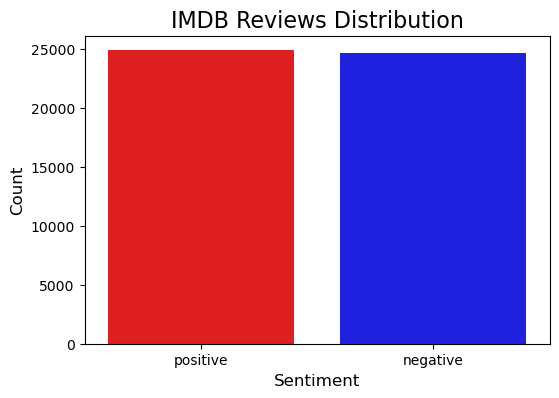

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot label distribution
plt.figure(figsize=(6, 4))

# Count the occurrences of each sentiment label (positive/negative)
label_counts = df['sentiment'].value_counts()

# Create a seaborn barplot with custom colors
sns.barplot(x=label_counts.index, y=label_counts.values, palette=['red', 'blue'])

# Add title and labels
plt.title("IMDB Reviews Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Display the plot
plt.show()
# This dataset is perfectly balanced

In [45]:
print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Negative reviews are', (round(df['sentiment'].value_counts()[1])),'i.e.',round(df['sentiment'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Positive reviews are 25000 i.e. 50.0 % of the dataset
Negative reviews are 25000 i.e. 50.0 % of the dataset


C:\Users\admin\AppData\Local\Temp\ipykernel_15220\2513960565.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
C:\Users\admin\AppData\Local\Temp\ipykernel_15220\2513960565.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Positive reviews are', (round(df['sentiment'].value_counts()[0])),'i.e.', round(df['sentiment'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
C:\Users\admin\AppData\Local\Temp\ipykernel_15220\2513960565.py:2: FutureWarning

### 4. Word Frequency by Sentiment

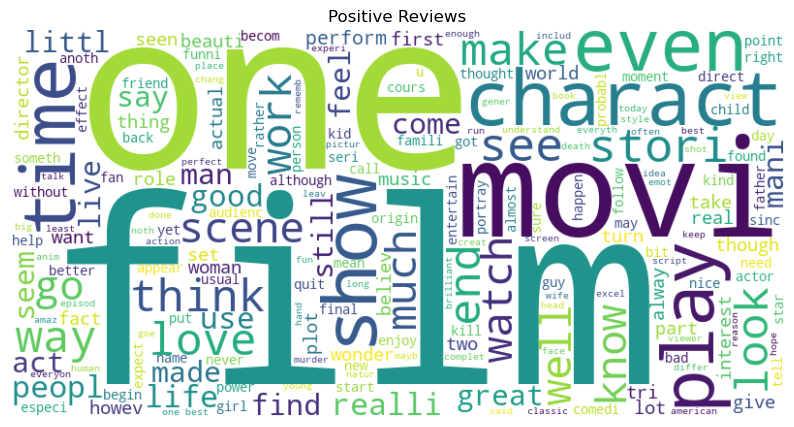

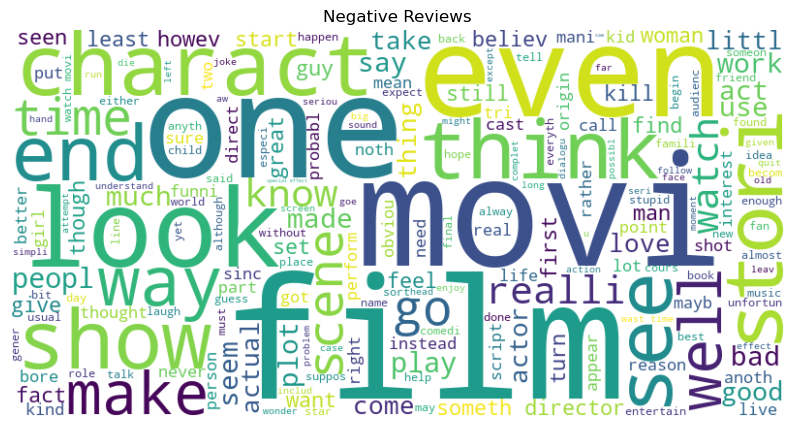

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['Processed_Review']
negative_reviews = df[df['sentiment'] == 'negative']['Processed_Review']

# Generate word clouds for positive and negative reviews
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display Positive WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')
plt.show()

# Display Negative WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')
plt.show()


### 5. Review Sentiment by Length

<Axes: xlabel='sentiment', ylabel='review_length'>

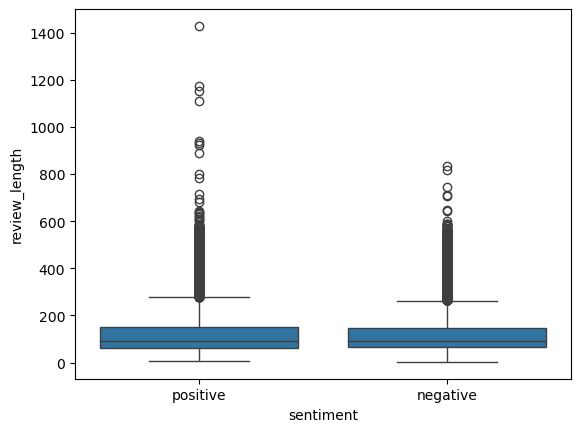

In [12]:
# How review length correlates with sentiment 
# Calculate text length (number of characters or words)
df['review_length'] = df['Processed_Review'].apply(lambda x: len(x.split()))

# Plot review length against sentiment
sns.boxplot(x='sentiment', y='review_length', data=df)

### 6. Distribution of number of words per review

In [18]:
positive_data = df[df.sentiment == 'positive']['Processed_Review']
negative_data = df[df.sentiment == 'negative']['Processed_Review']


C:\Users\admin\AppData\Local\Temp\ipykernel_54104\3870490014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word1, ax=ax1,color='green')
C:\Users\admin\AppData\Local\Temp\ipykernel_54104\3870490014.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word2,ax=ax2,color='red')


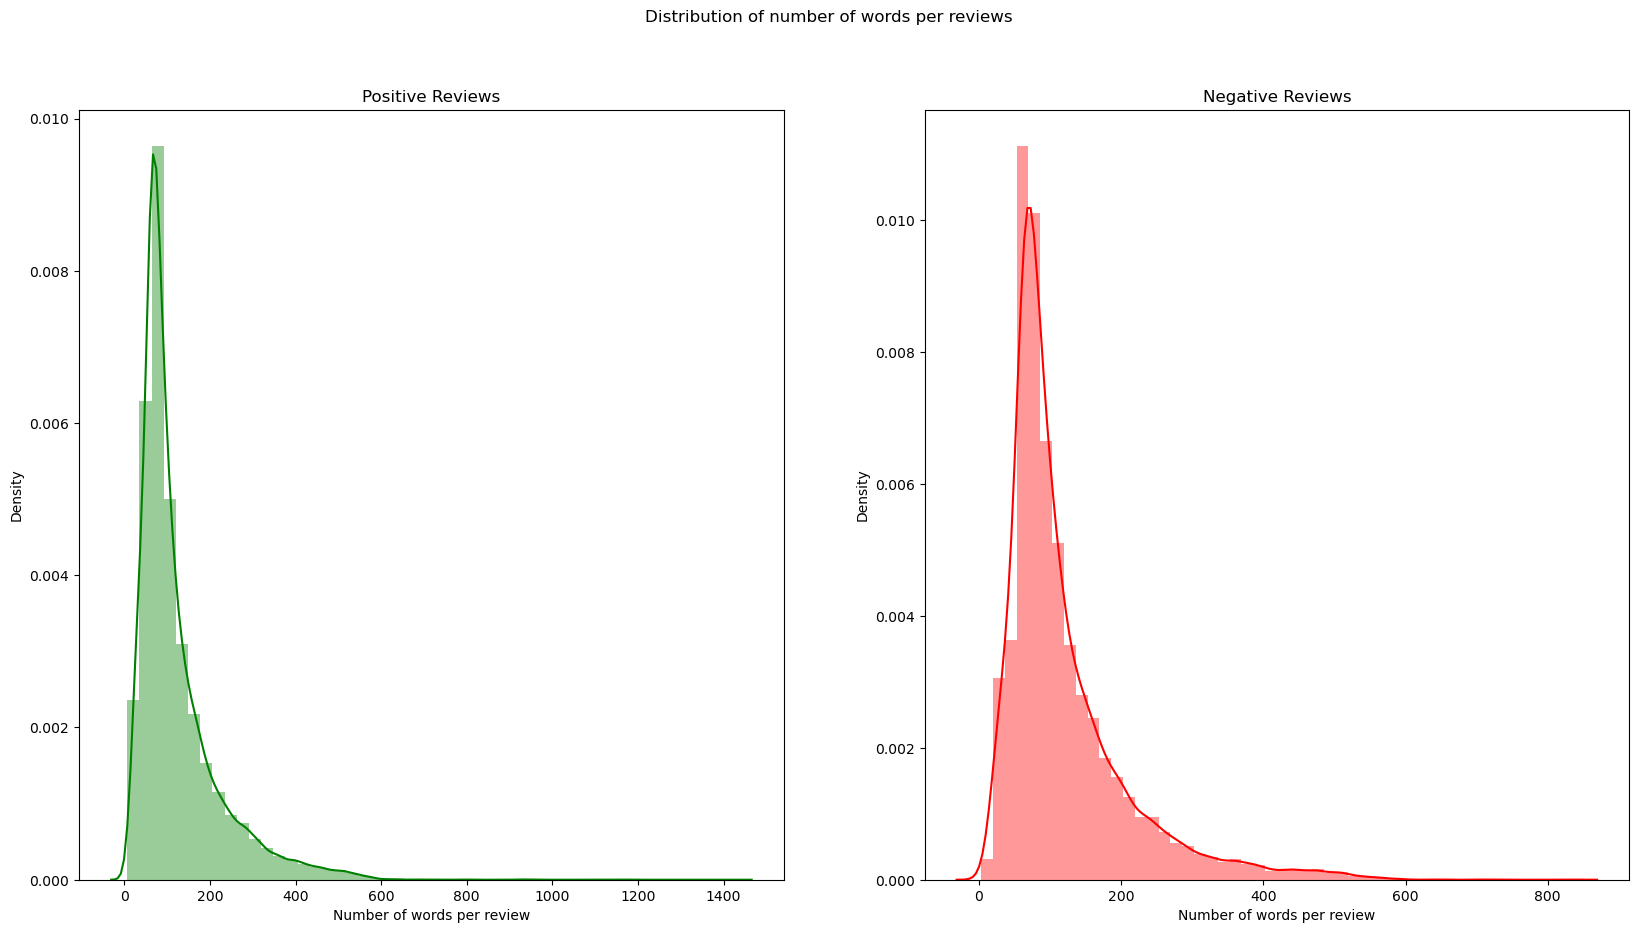

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word1 = positive_data.str.split().apply(lambda x : len(x) )
sns.distplot(word1, ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of words per review')
word2 = negative_data.str.split().apply(lambda x :len(x) )
sns.distplot(word2,ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of words per review')
fig.suptitle('Distribution of number of words per reviews')
plt.show()

### 8. Distribution of average word length in each review

C:\Users\admin\AppData\Local\Temp\ipykernel_54104\3897556053.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
C:\Users\admin\AppData\Local\Temp\ipykernel_54104\3897556053.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda 

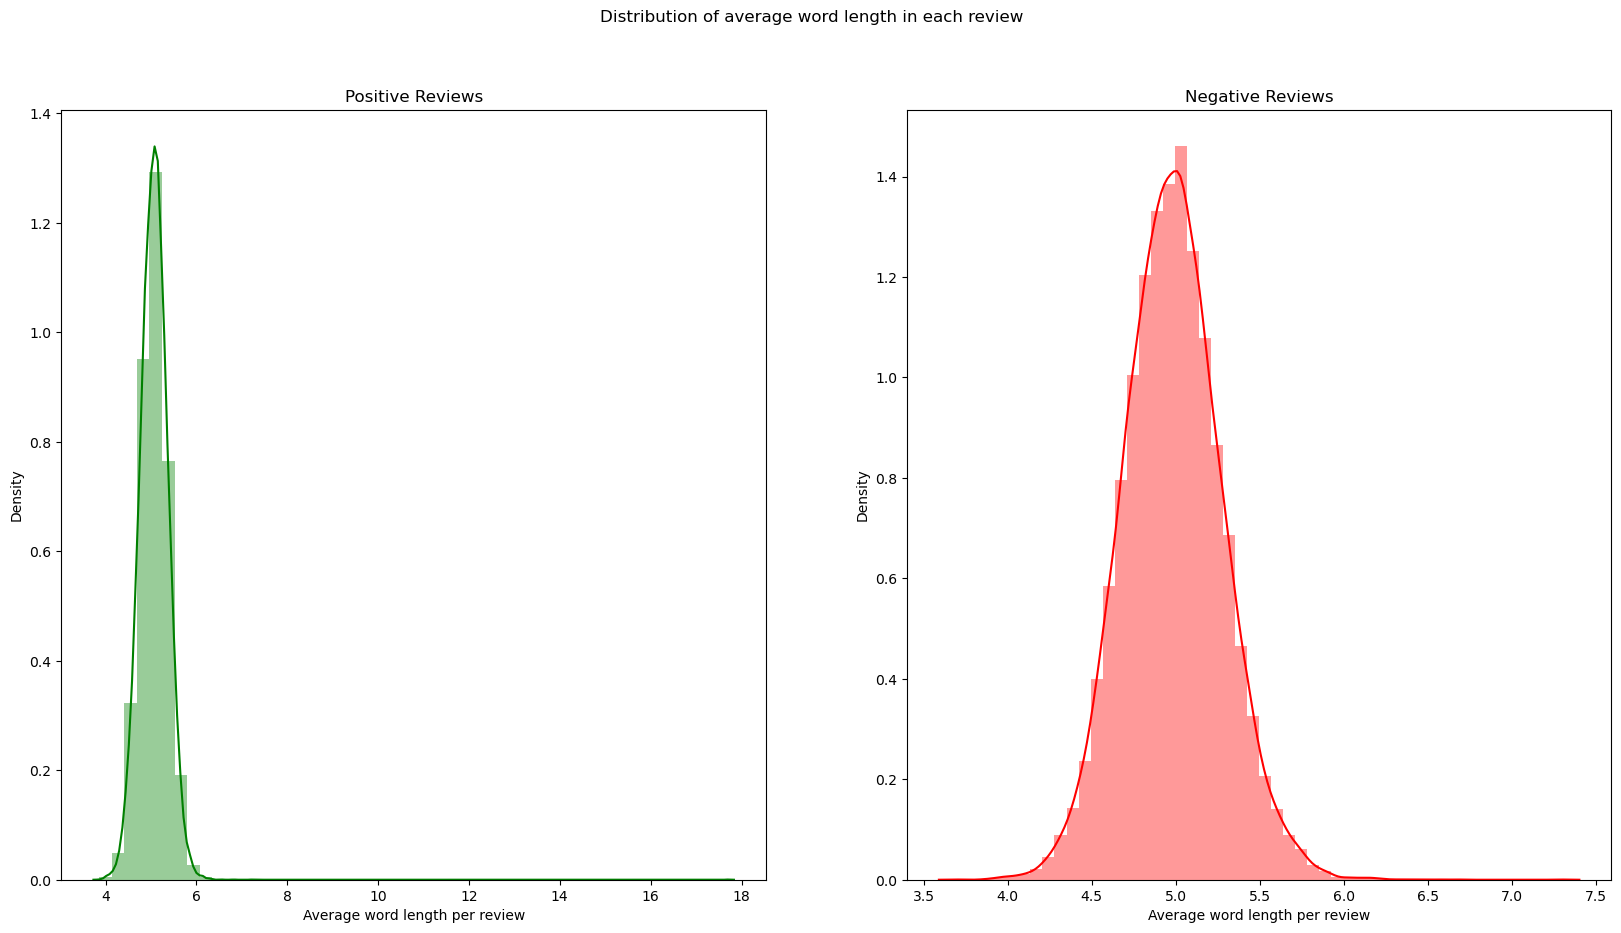

In [21]:
import numpy as np

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word = positive_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Average word length per review')
word = negative_data.str.split().apply(lambda x : [len(i) for i in x] )
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Average word length per review')
fig.suptitle('Distribution of average word length in each review')
plt.show()

### 9. Average Review Length

In [13]:
# Explore whether shorter or longer reviews tend to be more postive or negative
# Group by sentiment and calculate mean text length
df.groupby('sentiment')['review_length'].mean()

# Longer reviews tend to be more positie

sentiment
negative    119.373714
positive    122.340942
Name: review_length, dtype: float64

### 10. Most common word in the data

In [22]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.Processed_Review)
corpus[:5]

['one', 'review', 'mention', 'watch', 'oz']

In [23]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = pd.DataFrame(most_common,columns = ['corpus','countv'])
most_common

,corpus,countv
0,not,114025
1,movi,102462
2,film,95197
3,one,55022
4,like,44823
5,time,31688
6,would,30248
7,good,29973
8,make,29818
9,charact,28112


In [24]:
most_common = most_common.sort_values('countv')

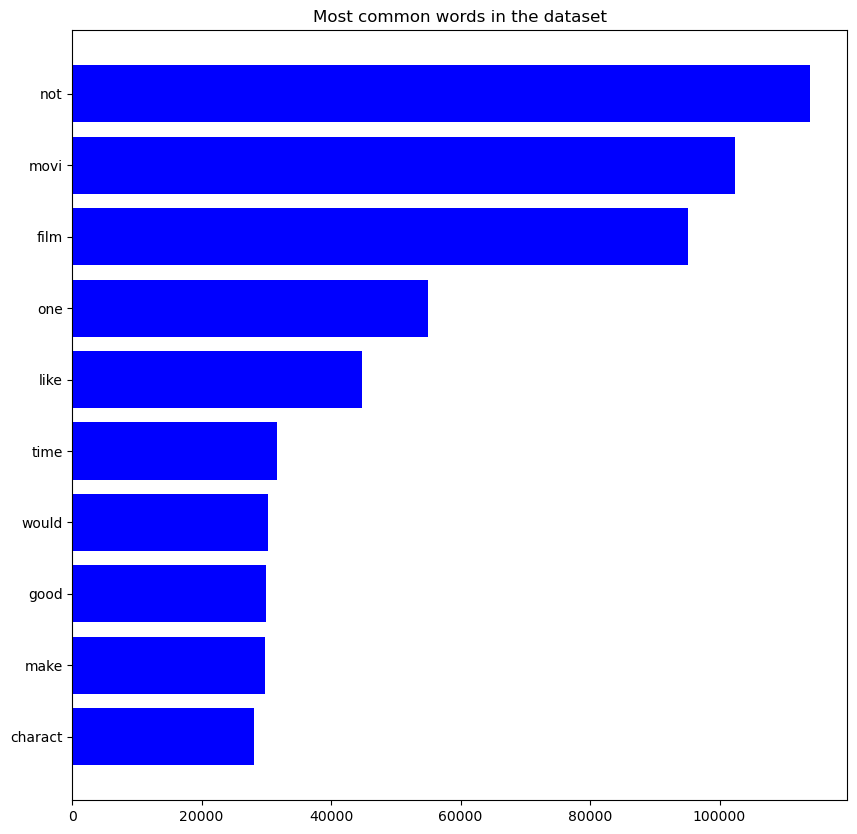

In [25]:
plt.figure(figsize =(10,10))
plt.yticks(range(len(most_common)), list(most_common.corpus))
plt.barh(range(len(most_common)), list(most_common.countv),align='center',color = 'blue')
plt.title('Most common words in the dataset')
plt.show()


### 11. N-grams analysis

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

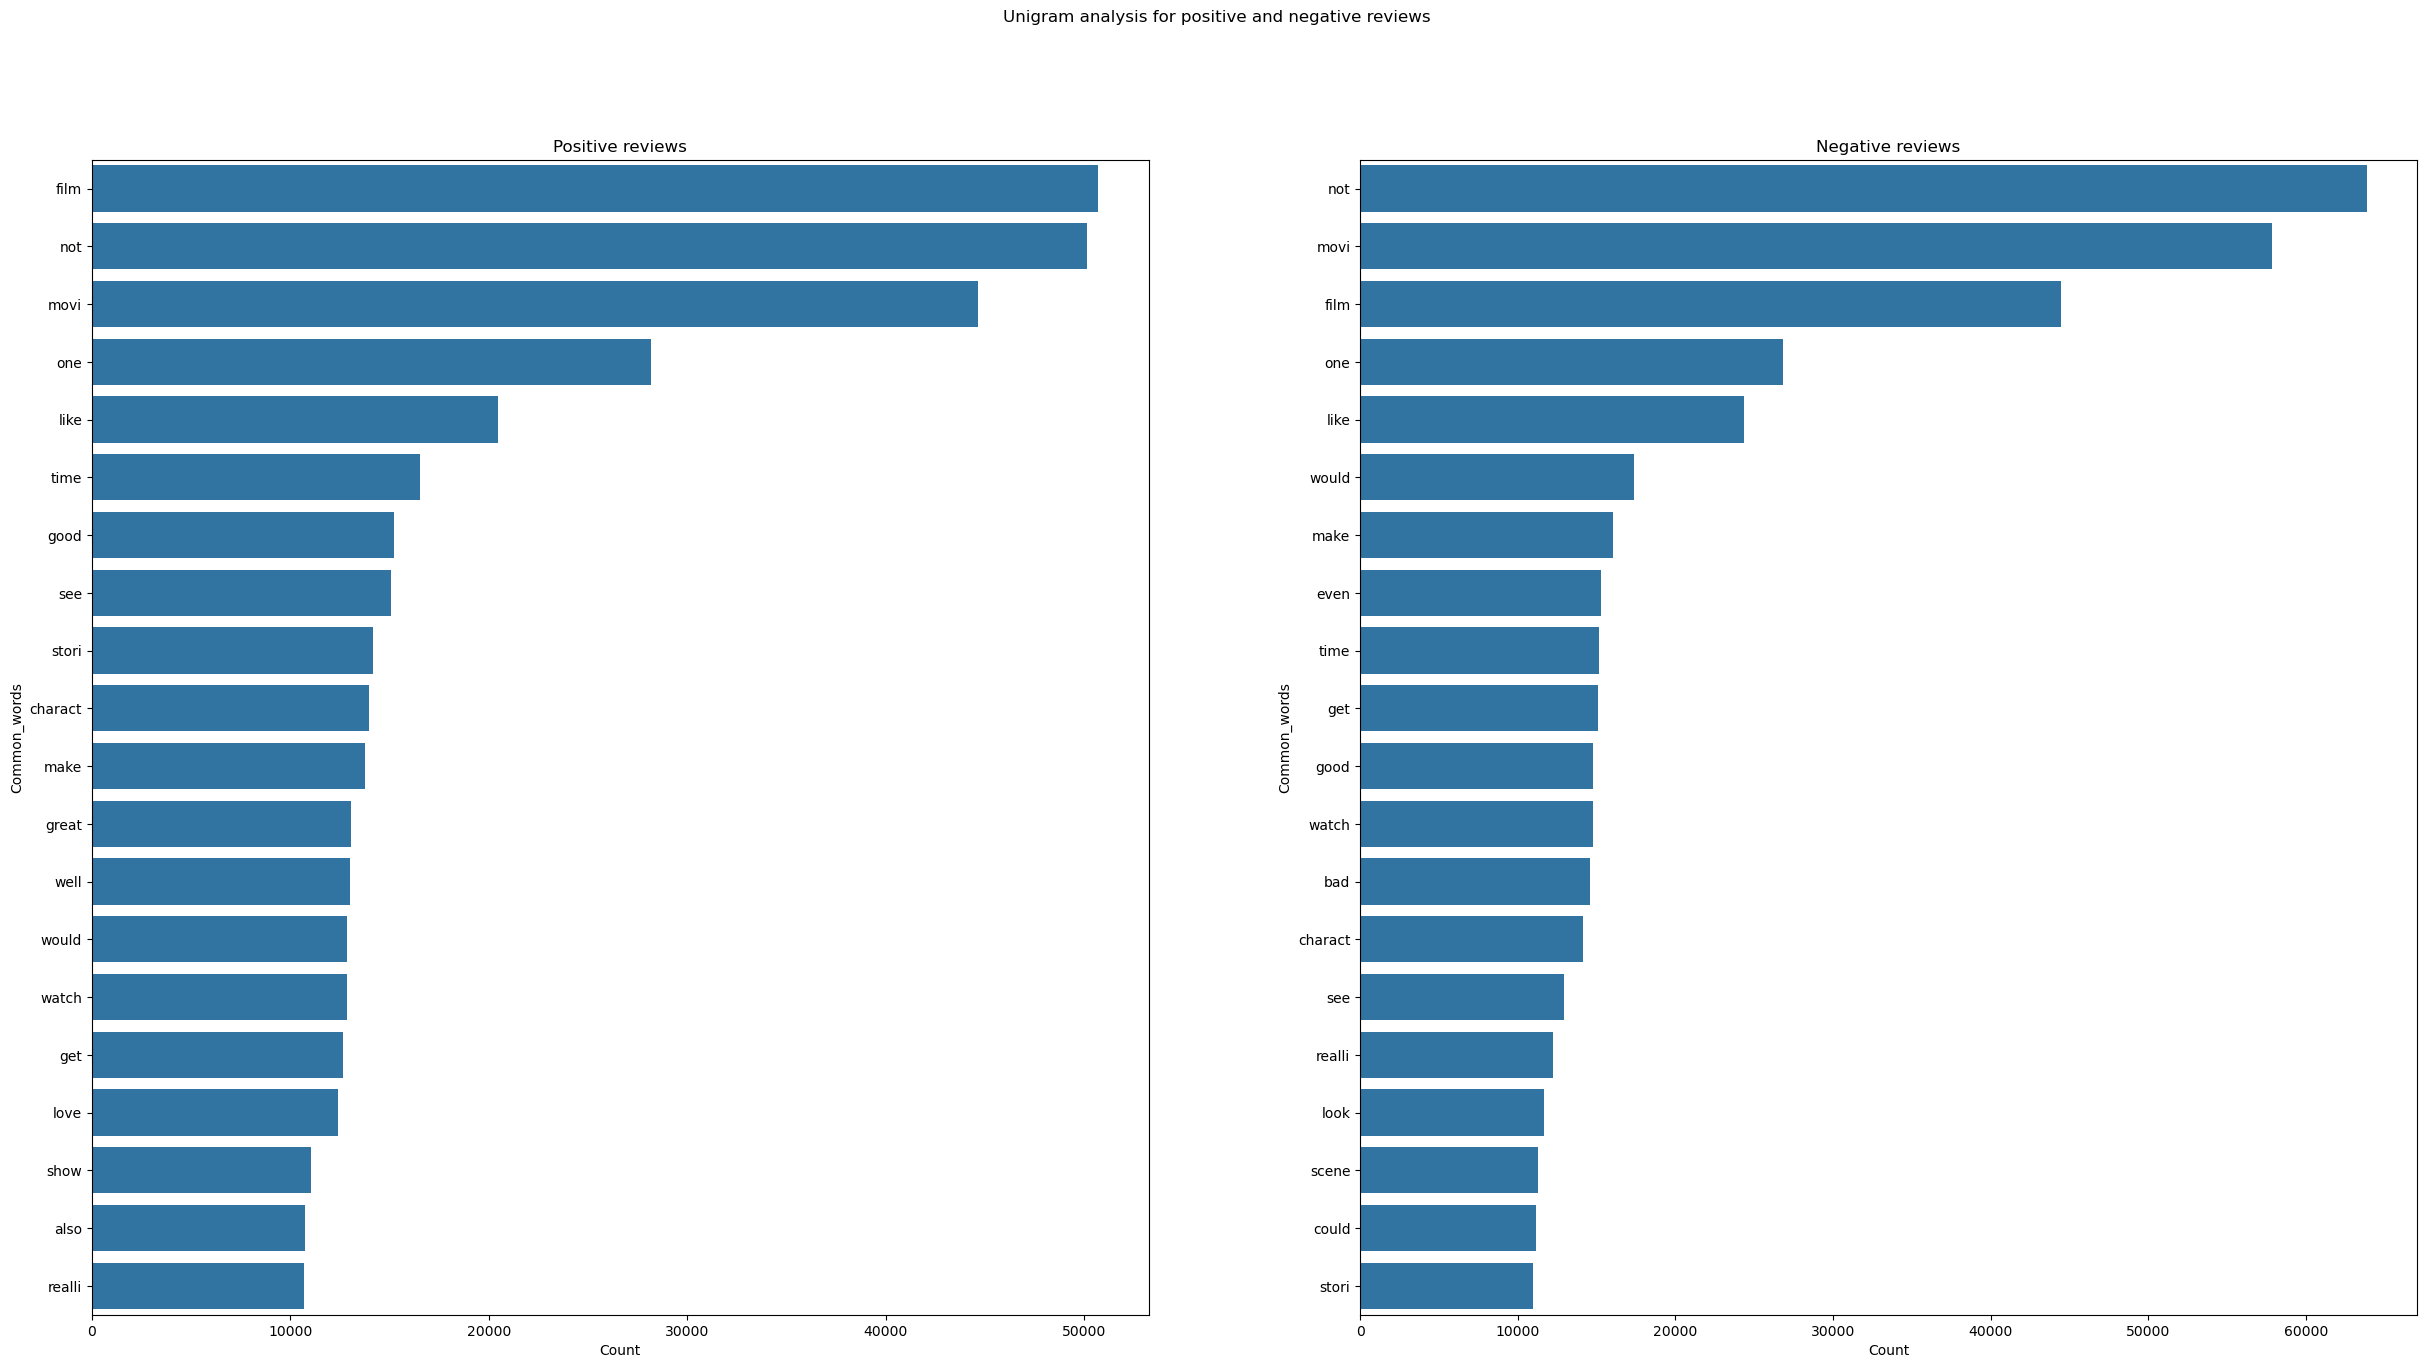

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))

uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')

uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

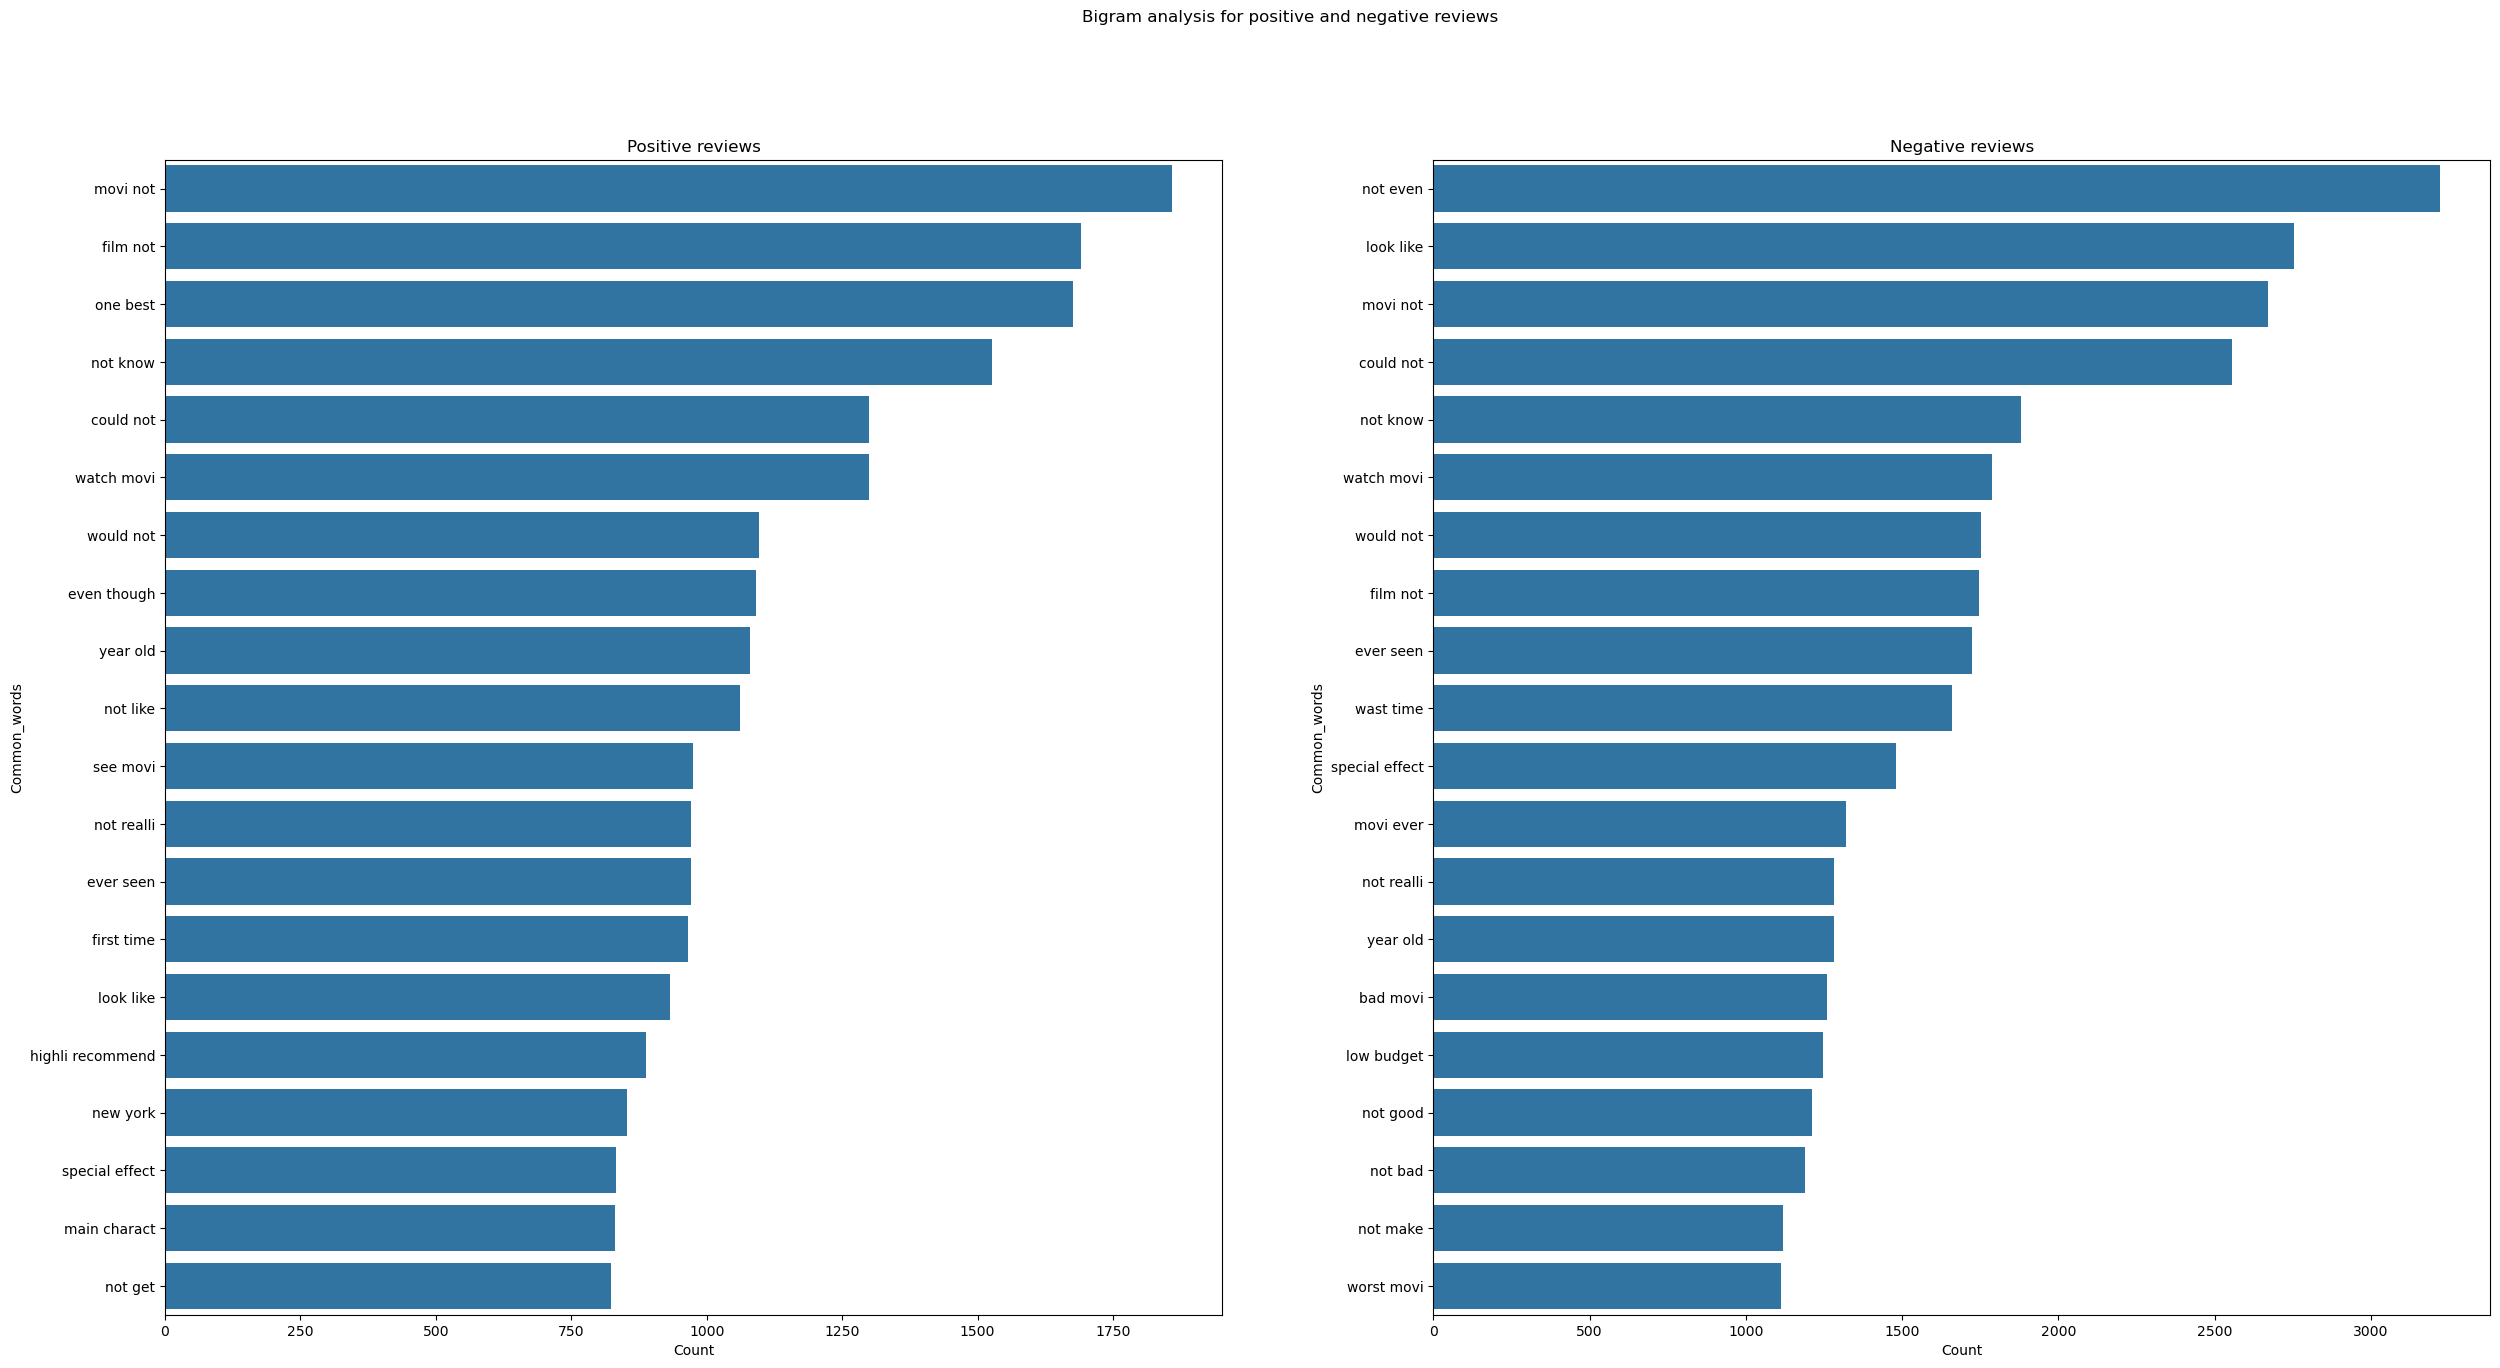

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

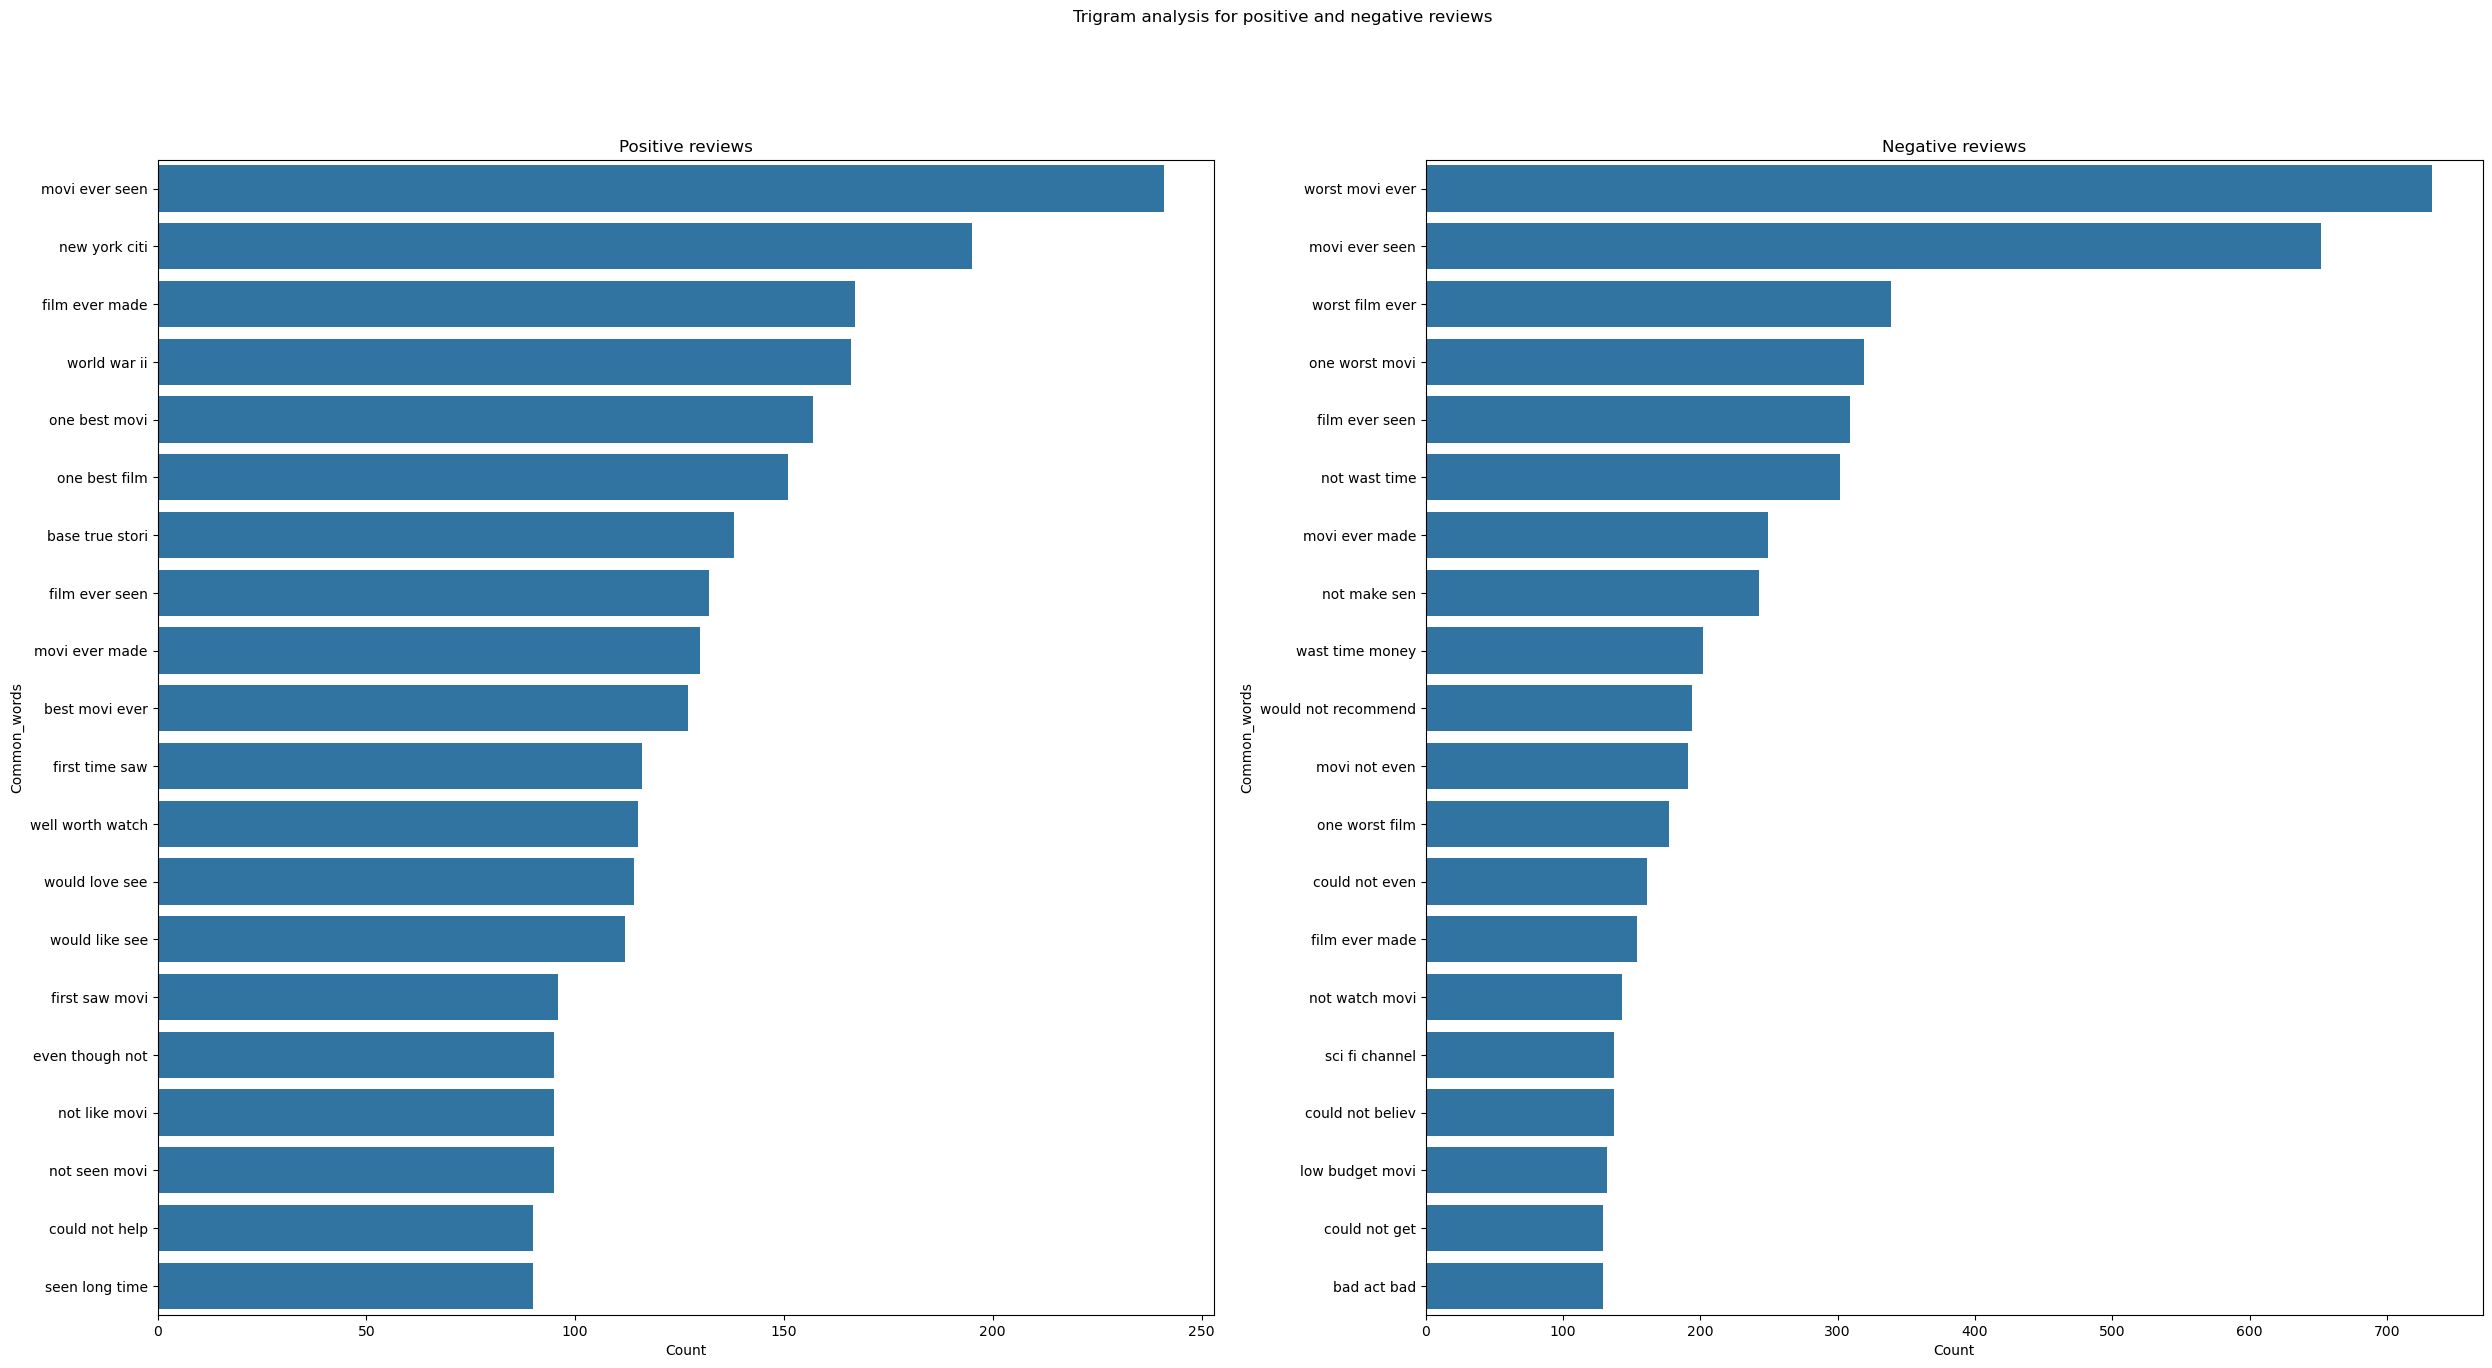

In [30]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [4]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{'against', 'and', 'just', 'too', 'below', 'how', "mustn't", 'more', "weren't", 'are', 'itself', 'there', "we're", "let's", "they've", "he'll", 'himself', 'above', 'has', "haven't", 'had', "you'd", 'yourselves', 'com', "you'll", "i'd", 'was', 'could', 'since', "he's", 'his', 'through', 'no', "that's", 'who', 'so', "don't", 'for', 'our', 'he', 'an', 'shall', "hadn't", 'to', 'in', 'during', 'if', 'hers', "what's", 'by', 'when', 'it', "who's", 'once', 'until', 'therefore', "they'll", "shouldn't", 'again', 'having', 'off', 'however', 'those', "how's", 'otherwise', 'after', 'doing', "there's", "didn't", 'from', 'about', 'nor', 'do', "she'll", 'some', 'up', 'also', 'before', "they'd", 'but', 'my', "you're", 'then', 'her', 'they', 'cannot', 'hence', "wasn't", 'him', 'between', "couldn't", 'ourselves', 'further', "can't", 'any', 'would', 'than', 'that', 'yourself', 'all', 'ever', 'what', 'r', 'which', 'because', "here's", "he'd", 'not', 'herself', 'these', 'few', "won't", 'under', "isn't", 'mo